<a href="https://colab.research.google.com/github/geadalfa/Bangkit-Machine-Learning-Class/blob/main/Polynomial_Regression_and_Overfitting_Geadalfa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Copyright 2020 Google LLC.

In [1]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Polynomial Regression and Overfitting

So far in this course, we have dealt exclusively with linear models. These have all been "straight-line" models where we attempt to draw a straight line that fits a regression.

Today we will start building curved-lined models based on [polynomial equations](https://en.wikipedia.org/wiki/Polynomial).

## Generating Sample Data

Let's start by generating some data based on a second degree polynomial.

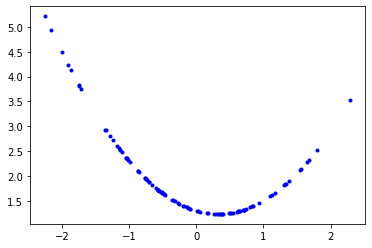

In [2]:
import numpy as np
import matplotlib.pyplot as plt

num_items = 100

np.random.seed(seed=420)
X = np.random.randn(num_items, 1)

# These coefficients are chosen arbitrarily.
y = 0.6*(X**2) - 0.4*X + 1.3

plt.plot(X, y, 'b.')
plt.show()

Let's add some randomness to create a more realistic dataset and re-plot the randomized data points and the fit line.

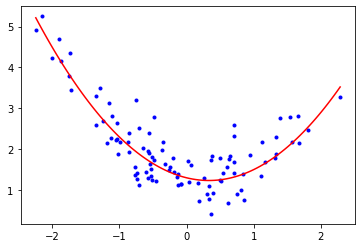

In [3]:
import numpy as np
import matplotlib.pyplot as plt

num_items = 100

np.random.seed(seed=420)
X = np.random.randn(num_items, 1)

# Create some randomness.
randomness = np.random.randn(num_items, 1) / 2

# This is the same equation as the plot above, with added randomness.
y = 0.6*(X**2) - 0.4*X + 1.3 + randomness

X_line = np.linspace(X.min(), X.max(), num=num_items)
y_line = 0.6*(X_line**2) - 0.4*X_line + 1.3

plt.plot(X, y, 'b.')
plt.plot(X_line, y_line, 'r-')
plt.show()

That looks much better! Now we can see that a 2-degree polynomial function fits this data reasonably well.

## Polynomial Fitting

We can now see a pretty obvious 2-degree polynomial that fits the scatter plot.

Scikit-learn offers a `PolynomialFeatures` class that handles polynomial combinations for a linear model. In this case, we know that a 2-degree polynomial is a good fit since the data was generated from a polynomial curve. Let's see if the model works.

We begin by creating a `PolynomialFeatures` instance of degree 2.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=2)
X_poly = pf.fit_transform(X)

X.shape, X_poly.shape

((100, 1), (100, 3))

You might be wondering what the `include_bias` parameter is. By default, it is `True`, in which case it forces the first exponent to be 0.

This adds a constant bias term to the equation. When we ask for no bias we start our exponents at 1 instead of 0.

This preprocessor generates a new feature matrix consisting of all polynomial combinations of the features. Notice that the input shape of `(100, 1)` becomes `(100, 2)` after transformation.

In this simple case, we doubled the number of features since we asked for a 2-degree polynomial and had one input feature. The number of generated features grows exponentially as the number of features and polynomial degrees increases.

## Model Fitting

We can now fit the model by passing our polynomial preprocessing data to the linear regressor.

How close did the intercept and coefficient match the values in the function we used to generate our data?

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.36103165]), array([[ 0.        , -0.35327962,  0.61333818]]))

## Visualization

We can plot our fitted line against the equation we used to generate the data. The fitted line is green, and the actual curve is red.

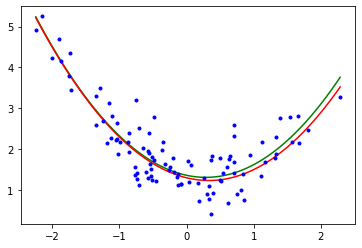

In [6]:
np.random.seed(seed=420)

# Create 100 even-spaced x-values.
X_line_fitted = np.linspace(X.min(), X.max(), num=100)

# Start our equation with the intercept.
y_line_fitted = lin_reg.intercept_

# For each exponent, raise the X value to that exponent and multiply it by the
# appropriate coefficient
for i in range(len(pf.powers_)):
  exponent = pf.powers_[i][0]
  y_line_fitted = y_line_fitted + \
    lin_reg.coef_[0][i] * (X_line_fitted**exponent)

plt.plot(X_line_fitted, y_line_fitted, 'g-')
plt.plot(X_line, y_line, 'r-')
plt.plot(X, y, 'b.')
plt.show()

# Overfitting

When using polynomial regression, it can be easy to *overfit* the data so that it performs well on the training data but doesn't perform well in the real world.

To understand overfitting we will create a fake dataset generated off of a linear equation, but we will use a polynomial regression as the model.

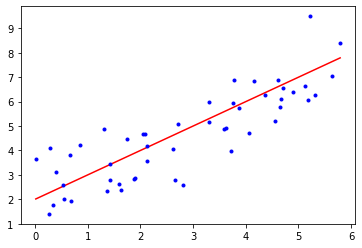

In [7]:
np.random.seed(seed=420)

# Create 50 points from a linear dataset with randomness.
num_items = 50
X = 6 * np.random.rand(num_items, 1)
y = X + 2 + np.random.randn(num_items, 1)

X_line = np.array([X.min(), X.max()])
y_line = X_line + 2

plt.plot(X_line, y_line, 'r-')
plt.plot(X, y, 'b.')
plt.show()

Let's now create a 10 degree polynomial to fit the linear data and fit the model.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(seed=420)

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

regression = LinearRegression()
regression.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualization

Let's draw the polynomial line that we fit to the data. To draw the line, we need to execute the 10 degree polynomial equation.

$$
y = k_0 + k_1x^1 + k_2x^2 + k_3x^3 + ... + k_9x^9 + k_{10}x^{10}
$$

Coding the above equation by hand is tedious and error-prone. It also makes it difficult to change the degree of the polynomial we are fitting.

Let's see if there is a way to write the code more dynamically, using the `PolynomialFeatures` and `LinearRegression` functions.

The `PolynomialFeatures` class provides us with a list of exponents that we can use for each portion of the polynomial equation.

In [9]:
poly_features.powers_

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

The `LinearRegression` class provides us with a list of coefficients that correspond to the powers provided by `PolynomialFeatures`.

In [10]:
regression.coef_

array([[-1.93762876e+01,  7.75135831e+01, -1.38337775e+02,
         1.36694413e+02, -8.16237576e+01,  3.06089393e+01,
        -7.24294715e+00,  1.04853764e+00, -8.47161797e-02,
         2.92466572e-03]])

It also provides an intercept.

In [11]:
regression.intercept_

array([3.98338796])

Having this information, we can take a set of $X$ values (in the code below we use 100), then run our equation on those values.

In [12]:
np.random.seed(seed=420)

# Create 100 even-spaced x-values.
X_line_fitted = np.linspace(X.min(), X.max(), num=100)

# Start our equation with the intercept.
y_line_fitted = regression.intercept_

# For each exponent, raise the X value to that exponent and multiply it by the
# appropriate coefficient
for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_line_fitted = y_line_fitted + \
    regression.coef_[0][i] * (X_line_fitted**exponent)

We can now plot the data points, the actual line used to generate them, and our fitted model.

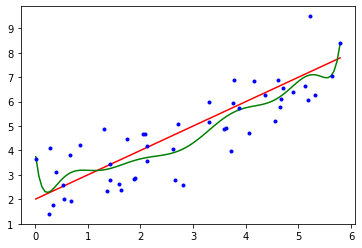

In [13]:
plt.plot(X_line, y_line, 'r-')
plt.plot(X_line_fitted, y_line_fitted, 'g-')
plt.plot(X, y, 'b.')
plt.show()

Notice how our line is very wavy, and it spikes up and down to pass through specific data points. (This is especially true for the lowest and highest $x$-values, where the curve passes through them exactly.) This is a sign of overfitting. The line fits the training data reasonably well, but it may not be as useful on new data.

## Using a Simpler Model

The most obvious way to prevent overfitting in this example is to simply reduce the degree of the polynomial.

The code below uses a 2-degree polynomial and seems to fit the data much better. A linear model would work well too.

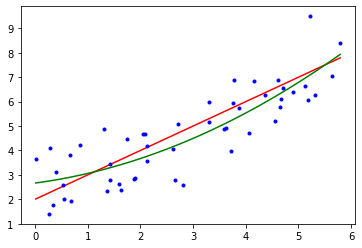

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

regression = LinearRegression()
regression.fit(X_poly, y)

X_line_fitted = np.linspace(X.min(), X.max(), num=100)
y_line_fitted = regression.intercept_
for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_line_fitted = y_line_fitted + \
    regression.coef_[0][i] * (X_line_fitted**exponent)

plt.plot(X_line, y_line, 'r-')
plt.plot(X_line_fitted, y_line_fitted, 'g-')
plt.plot(X, y, 'b.')
plt.show()

## Lasso Regularization

It is not always so clear what the "simpler" model choice is. Often, you will have to rely on regularization methods. A **regularization** is a method that penalizes large coefficients, with the aim of shrinking unnecessary coefficients to zero.

Least Absolute Shrinkage and Selection Operator (Lasso) regularization, also called L1 regularization, is a regularization method that adds the sum of the absolute values of the coefficients as a penalty in a cost function.

In scikit-learn, we can use the [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) model, which performs a linear regression with an L1 regression penalty.

In the resultant graph, you can see that the regression smooths out our polynomial curve quite a bit despite the polynomial being a degree 10 polynomial. Note that Lasso regression can make the impact of less important features completely disappear.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.45391630398585, tolerance: 0.01633157498379137
  positive)


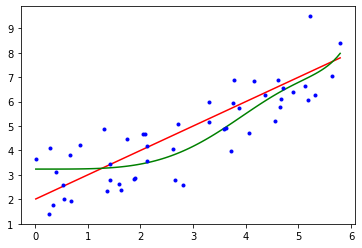

In [15]:
from sklearn.linear_model import Lasso

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

lasso_reg = Lasso(alpha=5.0)
lasso_reg.fit(X_poly, y)

X_line_fitted = np.linspace(X.min(), X.max(), num=100)
y_line_fitted = lasso_reg.intercept_
for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_line_fitted = y_line_fitted + lasso_reg.coef_[i] * (X_line_fitted**exponent)

plt.plot(X_line, y_line, 'r-')
plt.plot(X_line_fitted, y_line_fitted, 'g-')
plt.plot(X, y, 'b.')
plt.show()

## Ridge Regularization

Similar to Lasso regularization, [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) regularization adds a penalty to the cost function of a model. In the case of Ridge, also called L2 regularization, the penalty is the sum of squares of the coefficients.

Again, we can see that the regression smooths out the curve of our 10-degree polynomial.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.5572e-17): result may not be accurate.
  overwrite_a=True).T


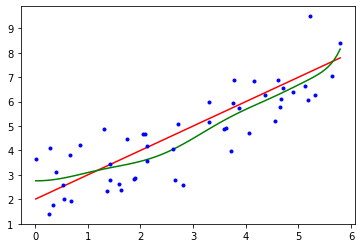

In [16]:
from sklearn.linear_model import Ridge

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_poly, y)

X_line_fitted = np.linspace(X.min(), X.max(), num=100)
y_line_fitted = ridge_reg.intercept_
for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_line_fitted = y_line_fitted + ridge_reg.coef_[0][i] * (X_line_fitted**exponent)

plt.plot(X_line, y_line, 'r-')
plt.plot(X_line_fitted, y_line_fitted, 'g-')
plt.plot(X, y, 'b.')
plt.show()

## ElasticNet Regularization

Another common form of regularization is [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) regularization. This regularization method combines the concepts of L1 and L2 regularization by applying a penalty containing both a squared value and an absolute value.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.00209745574522, tolerance: 0.01633157498379137
  positive)


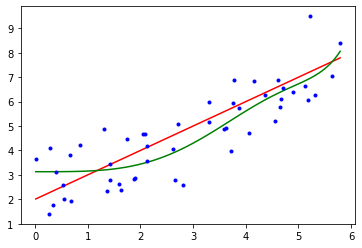

In [17]:
from sklearn.linear_model import ElasticNet

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

elastic_reg = ElasticNet(alpha=2.0, l1_ratio=0.5)
elastic_reg.fit(X_poly, y)

X_line_fitted = np.linspace(X.min(), X.max(), num=100)
y_line_fitted = elastic_reg.intercept_
for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_line_fitted = y_line_fitted + \
    elastic_reg.coef_[i] * (X_line_fitted**exponent)

plt.plot(X_line, y_line, 'r-')
plt.plot(X_line_fitted, y_line_fitted, 'g-')
plt.plot(X, y, 'b.')
plt.show()

## Other Strategies

Aside from regularization, there are other strategies that can be used to prevent overfitting. These include:

* [Early stopping](https://en.wikipedia.org/wiki/Early_stopping)
* [Cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)
* [Ensemble methods](https://en.wikipedia.org/wiki/Ensemble_learning)
* Simplifying your model
* Removing features

# Exercises

For these exercises we will work with the [diabetes dataset](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) that comes with scikit-learn. The data contains the following features:

1. age
1. sex
1. body mass index (bmi)
1. average blood pressure (bp)

It also contains six measures of blood serum, `s1` through `s6`. The target is a numeric assessment of the progression of the disease over the course of a year.

The data has been standardized.

In [18]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['progression'] = data.target

df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


Let's plot how body mass index relates to blood pressure.

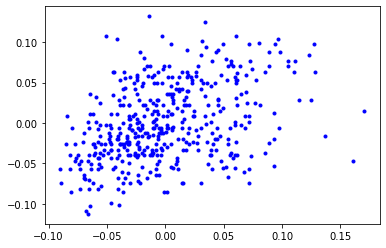

In [19]:
import matplotlib.pyplot as plt

plt.plot(df['bmi'], df['bp'], 'b.')
plt.show()

## Exercise 1: Polynomial Regression 

Let's create a model to see if we can map body mass index to blood pressure.

1. Create a 10-degree polynomial preprocessor for our regression
1. Create a linear regression model
1. Fit and transform the `bmi` values with the polynomial features preprocessor
1. Fit the transformed data using the linear regression
1. Plot the fitted line over a scatter plot of the data points

**Student Solution**

In [20]:
# Your code goes here

---

### Answer Key

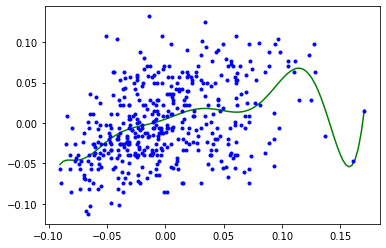

In [21]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['progression'] = data.target

X = df[['bmi']]
y = df['bp']

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

regression = LinearRegression()
regression.fit(X_poly, y)

X_line_fitted = np.linspace(X.min(), X.max(), num=100)
y_line_fitted = regression.intercept_

for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_line_fitted = y_line_fitted + \
    regression.coef_[i] * (X_line_fitted**exponent)

plt.plot(X_line_fitted, y_line_fitted, 'g-')
plt.plot(X, y, 'b.')
plt.show()

---

## Exercise 2: Regularization

Your model from exercise one likely looked like it overfit. Experiment with the Lasso, Ridge, and/or ElasticNet classes in the place of the `LinearRegression`. Adjust the parameters for whichever regularization class you use until you create a line that doesn't look to be under- or over-fitted.

**Student Solution**

In [22]:
# Your code goes here

---

### Answer Key

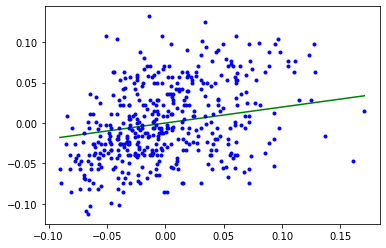

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['progression'] = data.target

X = df[['bmi']]
y = df['bp']

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

regression = Ridge()
regression.fit(X_poly, y)

X_line_fitted = np.linspace(X.min(), X.max(), num=100)
y_line_fitted = regression.intercept_

for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_line_fitted = y_line_fitted + \
    regression.coef_[i] * (X_line_fitted**exponent)

plt.plot(X_line_fitted, y_line_fitted, 'g-')
plt.plot(X, y, 'b.')
plt.show()

---

## Exercise 3: Other Models

Experiment with the [BayesianRidge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html). Does its fit line look better or worse than your other models?

**Student Solution**

In [24]:
# Your code goes here.

Does your fit line look better or worse than your other models?

> *Your Answer Goes Here*

---

### Answer Key

**Solution**

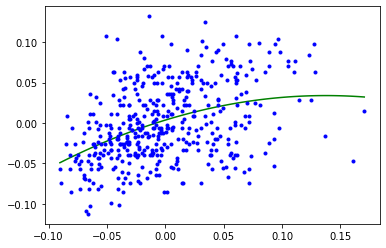

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['progression'] = data.target

X = df[['bmi']]
y = df['bp']

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X)

regression = BayesianRidge()
regression.fit(X_poly, y)

X_line_fitted = np.linspace(X.min(), X.max(), num=100)
y_line_fitted = regression.intercept_

for i in range(len(poly_features.powers_)):
  exponent = poly_features.powers_[i][0]
  y_line_fitted = y_line_fitted + \
    regression.coef_[i] * (X_line_fitted**exponent)

plt.plot(X_line_fitted, y_line_fitted, 'g-')
plt.plot(X, y, 'b.')
plt.show()

Does your fit line look better or worse than your other models?

> The answers are somewhat open here, depending on how the students tuned the models. In our case, when we applied ridge regression, we seemed to underfit a bit compared to Bayesian modelling. However, our Bayesian model might have been a little overfit for high BMI values.

---